In [ ]:
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

KNN

In [23]:
X = mushroomsdummies.drop(['edible_1'],axis=1)
X.head()

,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,cap-color_cinnamon,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y = mushroomsdummies['edible_1']
y.sample(10)

7178    0
4431    0
1870    1
5631    0
5957    0
3088    1
5707    0
1066    1
6745    0
2205    1
Name: edible_1, dtype: uint8

In [25]:
pd.Series(y).value_counts(normalize=True)

1    0.517971
0    0.482029
Name: edible_1, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

In [27]:
y_test

700     0
907     1
5546    1
3644    0
4279    0
       ..
4764    0
4336    0
3352    0
1504    1
3679    0
Name: edible_1, Length: 2031, dtype: uint8

In [28]:
# Vamos a querer graficar los distintos valores del score de cross validation
# en función del hiperparámetro n_neighbors. Para esto generamos una lista de
# diccionarios que después se puede convertir fácilmente en DataFrame.

# Probamos todos los enteros desde el 1 hasta el 20
# como posibles valores de n_neighbors a explorar.

kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 21):
    
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),\
                      'score_std':np.std(cv_scores), 'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [29]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores

,score_medio,score_std,n_neighbours
0,1.000000,0.000000,1
1,1.000000,0.000000,2
2,1.000000,0.000000,3
3,0.999836,0.000328,4
4,1.000000,0.000000,5
5,1.000000,0.000000,6
6,0.999672,0.000656,7
7,0.999836,0.000328,8
8,0.999508,0.000984,9
9,0.999508,0.000984,10


In [30]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,1.000000,0.000000,1,1.000000,1.000000
1,1.000000,0.000000,2,1.000000,1.000000
2,1.000000,0.000000,3,1.000000,1.000000
3,0.999836,0.000328,4,0.999507,1.000164
4,1.000000,0.000000,5,1.000000,1.000000
5,1.000000,0.000000,6,1.000000,1.000000
6,0.999672,0.000656,7,0.999016,1.000328
7,0.999836,0.000328,8,0.999508,1.000164
8,0.999508,0.000984,9,0.998523,1.000492
9,0.999508,0.000984,10,0.998523,1.000492


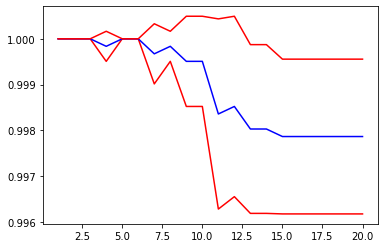

In [31]:
plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');

In [32]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,1.0,0.0,1,1.0,1.0
1,1.0,0.0,2,1.0,1.0
2,1.0,0.0,3,1.0,1.0
4,1.0,0.0,5,1.0,1.0
5,1.0,0.0,6,1.0,1.0


In [33]:
best_k = df_scores.loc[df_scores.score_medio ==\
                               df_scores.score_medio.max(),'n_neighbours'].values
best_k = best_k[1]
best_k

2

Comenzamos a Estandarizar la obtención del K

In [34]:
# Utilizamos sklearn para estandarizar la matriz de features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [35]:
# Verificamos que las columnas tengan media 0 y desvío 1.
print('media:',np.mean(X_train[:,1]))
print('desvio:',np.std(X_train[:,1]))

media: 9.32929900883112e-18
desvio: 1.0


In [36]:
# Calculamos nuevamente los scores de cross validation,
# pero esta vez sobre los features estandarizados:

scores_para_df_standar = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),\
                      'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [37]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.head()

,score_medio,score_std,n_neighbours
0,1.000000,0.000000,1
1,1.000000,0.000000,2
2,1.000000,0.000000,3
3,1.000000,0.000000,4
4,0.999508,0.000402,5


In [38]:
# Armamos nuevamente los límites para graficar

df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']
df_scores_standar.head()

,score_medio,score_std,n_neighbours,limite_superior,limite_inferior
0,1.000000,0.000000,1,1.00000,1.000000
1,1.000000,0.000000,2,1.00000,1.000000
2,1.000000,0.000000,3,1.00000,1.000000
3,1.000000,0.000000,4,1.00000,1.000000
4,0.999508,0.000402,5,0.99991,0.999106


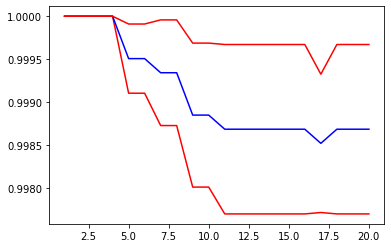

In [39]:
# Buscamos gráficamente el valor ópitmo para n_neighbors

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

In [40]:
df_scores_standar.loc[df_scores_standar.score_medio == df_scores_standar.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_superior,limite_inferior
0,1.0,0.0,1,1.0,1.0
1,1.0,0.0,2,1.0,1.0
2,1.0,0.0,3,1.0,1.0
3,1.0,0.0,4,1.0,1.0


In [41]:
best_k = df_scores_standar.loc[df_scores_standar.score_medio ==\
                               df_scores_standar.score_medio.max(),'n_neighbours'].values
best_k = best_k[1]
best_k

2

## 5 - Matriz de confusión

Ahora que decidimos cuál es el mejor preprocesamiento y el mejor valor posible para el hiperparámetro n_neighbors, podemos calcular la matriz de confusión sobre datos no utilizados en la selección del hiper parámetro.

In [42]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [43]:
# Lo utilizamos para predecir en test
#X_test = scaler.transform(X_test) # ¡Importantísimo estandarizar también los datos de test!
y_pred = model.predict(X_test)

In [44]:
# Obtenemos la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[ 851,  128],
       [   7, 1045]], dtype=int64)

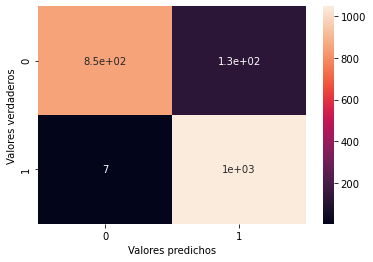

In [45]:
# Graficamos la matriz de confusión para visualizarla mejor
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Valores verdaderos')
plt.xlabel('Valores predichos');

In [48]:
# Podemos calcular manualmente la exactitud de nuestro modelo...

(851 + 1045) / len(y_pred)

0.9335302806499262

In [47]:
# ... o computarla utilizando el método del accuracy score

accuracy_score(y_test, y_pred)

0.9335302806499262